In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.models import Sequential
from sklearn.metrics import mean_squared_error

In [4]:
X_train = np.linspace(-1, 1, 20)
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [5]:
X_test = np.linspace(-1, 1, 20)
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

## Regression model

In [6]:
model = Sequential()

model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=adam,metrics=['mse'])

history = model.fit(X_train, y_train, epochs=500,validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1000 - mse: 0.1000 - val_loss: 0.0887 - val_mse: 0.0887
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - loss: 0.0768 - mse: 0.0768 - val_loss: 0.0692 - val_mse: 0.0692
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0541 - val_mse: 0.0541
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0432 - mse: 0.0432 - val_loss: 0.0428 - val_mse: 0.0428
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0276 - val_mse: 0.0276
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0182 - mse

In [7]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.010, Test: 0.037


In [8]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


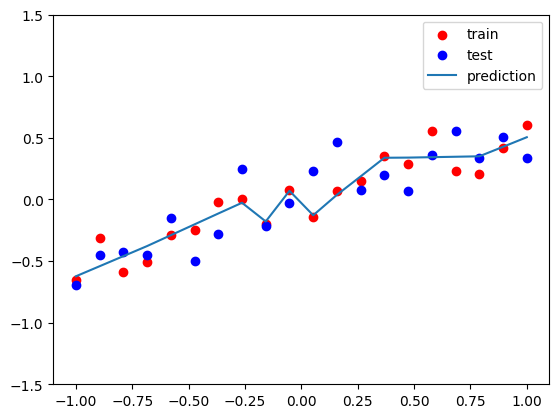

In [11]:
plt.figure()
plt.scatter(X_train, y_train, color='red', label='train')
plt.scatter(X_test, y_test, color='blue', label='test')
plt.plot(X_test, y_pred, label='prediction')
plt.legend()
plt.ylim(-1.5,1.5)
plt.show()

## Dropout

In [12]:
model2 = Sequential()

model2.add(Dense(128, input_dim=1, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='linear'))

adam = keras.optimizers.Adam(learning_rate=0.001)
model2.compile(loss='mean_squared_error', optimizer=adam,metrics=['mse'])

history2 = model2.fit(X_train, y_train, epochs=500,validation_data=(X_test, y_test))

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1275 - mse: 0.1275 - val_loss: 0.1090 - val_mse: 0.1090
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.1131 - mse: 0.1131 - val_loss: 0.0929 - val_mse: 0.0929
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0825 - mse: 0.0825 - val_loss: 0.0790 - val_mse: 0.0790
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0701 - mse: 0.0701 - val_loss: 0.0675 - val_mse: 0.0675
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0579 - val_mse: 0.0579
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0498 - val_mse: 0.0498
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0433 - val_mse: 0.0433
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0435 - mse: 0.0435 - val_loss: 0.0382 - val_mse: 0.0382
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0325 - mse: 0.0325 - va

In [13]:
# evaluate the model
_, train_mse = model2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model2.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.013, Test: 0.034


In [14]:
y_pred = model2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


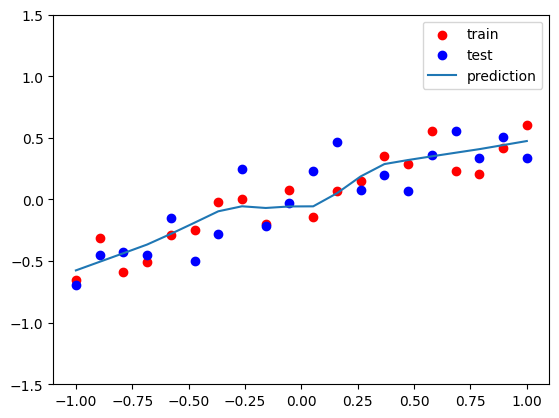

In [15]:
plt.figure()
plt.scatter(X_train, y_train, color='red', label='train')
plt.scatter(X_test, y_test, color='blue', label='test')
plt.plot(X_test, y_pred, label='prediction')
plt.legend()
plt.ylim(-1.5,1.5)
plt.show()